In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [3]:
# For mapping objcect type to int
def set_col_mapping(df, col_type):
    object_columns = df.select_dtypes(include=[col_type]).columns.tolist()
    print(object_columns)
    for col in object_columns:
        res = {}
        for x, value in enumerate(df[col].value_counts().index.tolist()):
            res[value] = x
        print(res)
        df[col] = df[col].map(res)
    return df

In [4]:
df = pd.read_csv("tvs.csv", low_memory=False)

# EDA

In [5]:
df.head()

,_id,id,name,original_name,overview,tagline,in_production,status,original_language,origin_country[0],...,production_companies[9]._id,production_companies[10]._id,production_companies[11]._id,production_companies[12]._id,production_companies[13]._id,production_companies[14]._id,production_companies[15]._id,production_companies[16]._id,production_companies[17]._id,__v
0,6457d26c7b901e08b141869d,13,How do you like Wednesday?,水曜どうでしょう,How do you like Wednesday? was a Japanese tele...,NaN,True,Returning Series,ja,JP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6457d26c7b901e08b141867a,2,Clerks,Clerks,The continuing adventures of store clerks Dant...,NaN,False,Canceled,en,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6457d26c7b901e08b141869f,14,Shuriken School,Shuriken School,Shuriken School is a British animated series t...,NaN,False,Ended,en,FR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6457d26c7b901e08b14186a5,15,Mister Rogers' Neighborhood,Mister Rogers' Neighborhood,Mister Rogers' Neighborhood is an American chi...,Won't you be my neighbor?,False,Ended,en,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6457d26c7b901e08b14186ab,16,Sidewalks: Video Nite,Sidewalks: Video Nite,Sidewalks: Video Nite is an American televisio...,NaN,False,Ended,en,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152970 entries, 0 to 152969
Columns: 188 entries, _id to __v
dtypes: bool(1), float64(46), int64(3), object(138)
memory usage: 218.4+ MB


In [7]:
df.describe()

,id,number_of_episodes,number_of_seasons,genres[0].id,genres[1].id,genres[2].id,genres[3].id,genres[4].id,genres[5].id,genres[6].id,...,production_companies[9].id,production_companies[10].id,production_companies[11].id,production_companies[12].id,production_companies[13].id,production_companies[14].id,production_companies[15].id,production_companies[16].id,production_companies[17].id,__v
count,152970.000000,152336.000000,152970.000000,89608.000000,32357.000000,9282.000000,2027.000000,370.000000,70.000000,12.000000,...,61.000000,36.000000,23.000000,11.000000,7.000000,6.000000,3.000000,3.000000,1.0,2169.0
mean,97322.237916,24.493724,1.546029,2773.817840,4629.259604,6565.700065,7550.228416,7507.908108,8031.400000,4510.833333,...,95481.491803,78937.583333,73179.869565,61701.000000,64891.428571,23327.833333,37427.000000,19389.000000,1023.0,0.0
std,67273.493146,135.570884,3.016216,4647.295612,5246.055694,5118.603134,4815.107891,4815.136201,4571.057916,5520.824079,...,77662.844724,74402.587761,68198.621721,59264.607941,74751.486440,52211.170297,55332.046528,15927.228667,NaN,0.0
min,1.000000,0.000000,0.000000,16.000000,16.000000,16.000000,16.000000,16.000000,18.000000,18.000000,...,201.000000,25.000000,297.000000,124.000000,310.000000,104.000000,46.000000,1678.000000,1023.0,0.0
25%,40990.250000,1.000000,1.000000,18.000000,18.000000,35.000000,80.000000,80.000000,9648.000000,30.750000,...,9148.000000,8984.000000,10473.500000,9310.000000,7957.000000,1632.250000,5645.000000,12815.500000,1023.0,0.0
50%,87499.500000,6.000000,1.000000,35.000000,80.000000,10751.000000,10759.000000,10759.000000,10762.000000,89.500000,...,95861.000000,59347.000000,65646.000000,58209.000000,20498.000000,2507.000000,11244.000000,23953.000000,1023.0,0.0
75%,134069.500000,20.000000,1.000000,9648.000000,10759.000000,10762.000000,10765.000000,10765.000000,10765.000000,10765.000000,...,166410.000000,152159.250000,105428.000000,92490.000000,112472.500000,3351.750000,56117.500000,28244.500000,1023.0,0.0
max,228550.000000,19925.000000,345.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10768.000000,10765.000000,...,201059.000000,196955.000000,198852.000000,162015.000000,192573.000000,129875.000000,100991.000000,32536.000000,1023.0,0.0


Delete Unwanted Columns

In [8]:
origin     = [col for col in df.columns if col.startswith('origin')]
production = [col for col in df.columns if col.startswith('production')]
genres     = [col for col in df.columns if col.startswith('genres')]
created_by = [col for col in df.columns if col.startswith('created_by')]

dropies = origin + production + genres + created_by
df.drop(dropies, axis=1, inplace=True)
df.drop(["_id", "tagline", "poster_path", "in_production", "status", "first_air_date", "last_air_date", "__v"], axis=1, inplace=True)

In [9]:
df.head()

,id,name,overview,number_of_episodes,number_of_seasons,vote_average,vote_count,popularity
0,13,How do you like Wednesday?,How do you like Wednesday? was a Japanese tele...,568.0,4,9.200,2,21.207
1,2,Clerks,The continuing adventures of store clerks Dant...,6.0,1,6.897,78,10.620
2,14,Shuriken School,Shuriken School is a British animated series t...,26.0,1,5.500,6,3.034
3,15,Mister Rogers' Neighborhood,Mister Rogers' Neighborhood is an American chi...,850.0,31,4.977,88,19.167
4,16,Sidewalks: Video Nite,Sidewalks: Video Nite is an American televisio...,399.0,11,0.000,0,2.910


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152970 entries, 0 to 152969
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  152970 non-null  int64  
 1   name                152964 non-null  object 
 2   overview            85422 non-null   object 
 3   number_of_episodes  152336 non-null  float64
 4   number_of_seasons   152970 non-null  int64  
 5   vote_average        152970 non-null  float64
 6   vote_count          152970 non-null  int64  
 7   popularity          152970 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 9.3+ MB


Sort Data By Movie ID and Reset Index

In [11]:
df = df.sort_values(by="id")
df.reset_index(drop=True, inplace=True)
df.head(10)

,id,name,overview,number_of_episodes,number_of_seasons,vote_average,vote_count,popularity
0,1,Pride,The theme is strength and gallantry.Haru Saton...,11.0,1,8.192,13,6.770
1,2,Clerks,The continuing adventures of store clerks Dant...,6.0,1,6.897,78,10.620
2,3,The Message,The Message was a surreal comedy series which ...,6.0,1,8.500,2,0.707
3,4,The Amazing Mrs Pritchard,Supermarket manager Ros Pritchard decides to s...,6.0,1,7.300,3,3.452
4,5,La Job,La Job is a French Canadian comedy television ...,12.0,1,0.720,166,5.942
5,6,Strange Days at Blake Holsey High,Black Hole High is a Canadian science fiction ...,42.0,4,8.700,10,3.428
6,7,Bugs,Bugs was a British television drama series whi...,40.0,4,6.923,13,9.157
7,8,Te Kaea,Te Kāea is a New Zealand television news show ...,0.0,1,8.000,1,0.600
8,9,Match Game,The five-day-a-week syndicated successor to th...,1438.0,1,7.600,17,5.260
9,10,All in Good Faith,"British sitcom in which Reverend Philip Lambe,...",18.0,3,1.808,65,5.857


Check to see if squid game exists in the data

In [12]:
found = False
index = 0
for i, name in enumerate(df["name"]):
    if "Squid Game" == str(name):
        found = True
        index = i
        break
if found:
    print("index =", index)
    print(df.iloc[index])
else:
    print("Not found")

index = 81386
id                                                                93405
name                                                         Squid Game
overview              Hundreds of cash-strapped players accept a str...
number_of_episodes                                                  9.0
number_of_seasons                                                     2
vote_average                                                      7.834
vote_count                                                        12601
popularity                                                      118.375
Name: 81386, dtype: object


Object types in the list

In [13]:
objects = [col for col in df.columns if df[col].dtype == 'object']
print(len(objects), objects)

2 ['name', 'overview']


Save the Id/Name CSV file for later

<Axes: >

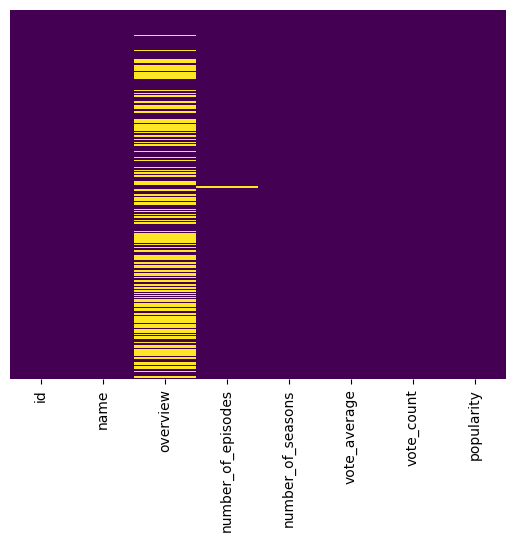

In [14]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [15]:
df["number_of_episodes"] = df["number_of_episodes"].fillna(df["number_of_episodes"].mean())
#df["overview"] = df["overview"].fillna("")
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85422 entries, 0 to 152969
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  85422 non-null  int64  
 1   name                85422 non-null  object 
 2   overview            85422 non-null  object 
 3   number_of_episodes  85422 non-null  float64
 4   number_of_seasons   85422 non-null  int64  
 5   vote_average        85422 non-null  float64
 6   vote_count          85422 non-null  int64  
 7   popularity          85422 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 5.9+ MB


<Axes: >

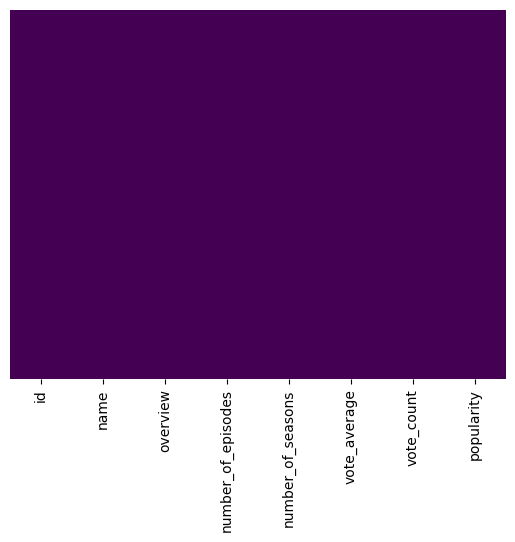

In [16]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [17]:
df.head()

,id,name,overview,number_of_episodes,number_of_seasons,vote_average,vote_count,popularity
0,1,Pride,The theme is strength and gallantry.Haru Saton...,11.0,1,8.192,13,6.770
1,2,Clerks,The continuing adventures of store clerks Dant...,6.0,1,6.897,78,10.620
2,3,The Message,The Message was a surreal comedy series which ...,6.0,1,8.500,2,0.707
3,4,The Amazing Mrs Pritchard,Supermarket manager Ros Pritchard decides to s...,6.0,1,7.300,3,3.452
4,5,La Job,La Job is a French Canadian comedy television ...,12.0,1,0.720,166,5.942


In [18]:
ndf = df[["id", "name"]].sort_values(by="id")
ndf.head()

,id,name
0,1,Pride
1,2,Clerks
2,3,The Message
3,4,The Amazing Mrs Pritchard
4,5,La Job


In [19]:
df.to_csv("tvs_clean_df.csv")
ndf.to_csv("tvs_names_df.csv")

# Standardization and Normalizing
Experimenting with different methods 

In [20]:
'''
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop("id", axis=1))
dfs = pd.DataFrame(scaled_data, columns=df.columns[1:], index = [i for i in range(1, len(scaled_data) + 1)])
dfs.head(10)

normalizer = Normalizer()
normalized_data = normalizer.fit_transform(df.drop("id", axis=1))
dfn = pd.DataFrame(normalized_data, columns=df.columns[1:], index = [i for i in range(1, len(normalized_data) + 1)])
dfn.head(10)

minmax_scaler = MinMaxScaler()
minmax_data = minmax_scaler.fit_transform(df.drop("id", axis=1))
dfm = pd.DataFrame(minmax_data, columns=df.columns[1:], index = [i for i in range(1, len(minmax_data) + 1)])
dfm.head(10)
'''

'\nscaler = StandardScaler()\nscaled_data = scaler.fit_transform(df.drop("id", axis=1))\ndfs = pd.DataFrame(scaled_data, columns=df.columns[1:], index = [i for i in range(1, len(scaled_data) + 1)])\ndfs.head(10)\n\nnormalizer = Normalizer()\nnormalized_data = normalizer.fit_transform(df.drop("id", axis=1))\ndfn = pd.DataFrame(normalized_data, columns=df.columns[1:], index = [i for i in range(1, len(normalized_data) + 1)])\ndfn.head(10)\n\nminmax_scaler = MinMaxScaler()\nminmax_data = minmax_scaler.fit_transform(df.drop("id", axis=1))\ndfm = pd.DataFrame(minmax_data, columns=df.columns[1:], index = [i for i in range(1, len(minmax_data) + 1)])\ndfm.head(10)\n'

In [21]:
'''
fig, axes = plt.subplots(3, 2, figsize=(15, 5))
axes = axes.flatten()

axes[0].scatter(dfs["vote_count"], dfs["popularity"])
axes[0].set_xlabel("vote_count")
axes[0].set_ylabel("popularity")
axes[0].set_title("Standardized")

axes[1].scatter(dfs["vote_average"], dfs["popularity"])
axes[1].set_xlabel("vote_average")
axes[1].set_ylabel("popularity")
axes[1].set_title("Standardized")

axes[2].scatter(dfm["vote_count"], dfm["popularity"])
axes[2].set_xlabel("vote_count")
axes[2].set_ylabel("popularity")
axes[2].set_title("MinMax Normalized")

axes[3].scatter(dfm["vote_average"], dfm["popularity"])
axes[3].set_xlabel("vote_average")
axes[3].set_ylabel("popularity")
axes[3].set_title("MinMax Normalized")

axes[4].scatter(dfn["vote_count"], dfn["popularity"])
axes[4].set_xlabel("vote_count")
axes[4].set_ylabel("popularity")
axes[4].set_title("Normalized")

axes[5].scatter(dfn["vote_average"], dfn["popularity"])
axes[5].set_xlabel("vote_average")
axes[5].set_ylabel("popularity")
axes[5].set_title("Normalized")

plt.tight_layout()
plt.show()
'''

'\nfig, axes = plt.subplots(3, 2, figsize=(15, 5))\naxes = axes.flatten()\n\naxes[0].scatter(dfs["vote_count"], dfs["popularity"])\naxes[0].set_xlabel("vote_count")\naxes[0].set_ylabel("popularity")\naxes[0].set_title("Standardized")\n\naxes[1].scatter(dfs["vote_average"], dfs["popularity"])\naxes[1].set_xlabel("vote_average")\naxes[1].set_ylabel("popularity")\naxes[1].set_title("Standardized")\n\naxes[2].scatter(dfm["vote_count"], dfm["popularity"])\naxes[2].set_xlabel("vote_count")\naxes[2].set_ylabel("popularity")\naxes[2].set_title("MinMax Normalized")\n\naxes[3].scatter(dfm["vote_average"], dfm["popularity"])\naxes[3].set_xlabel("vote_average")\naxes[3].set_ylabel("popularity")\naxes[3].set_title("MinMax Normalized")\n\naxes[4].scatter(dfn["vote_count"], dfn["popularity"])\naxes[4].set_xlabel("vote_count")\naxes[4].set_ylabel("popularity")\naxes[4].set_title("Normalized")\n\naxes[5].scatter(dfn["vote_average"], dfn["popularity"])\naxes[5].set_xlabel("vote_average")\naxes[5].set_yl